In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from skimage import io, color, filters, feature, exposure, morphology
from scipy import ndimage

In [2]:
INPUT = 'data/'

In [3]:
def image_read(filename):
    return cv2.imread(INPUT + filename, cv2.IMREAD_COLOR)


def show_image(image):
    plt.figure(figsize=(40,40))
    plt.imshow(image, vmin=0, vmax=1, cmap='gray')

### Get contours

In [4]:
def normalize(array, new_min, new_max): 
    return new_min + (new_max - new_min) * (array - array.min()) / (array.max() - array.min())


def get_contours(image, limit=0.25):
    scale = 1
    delta = 0
    ddepth = cv2.CV_16S


    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    grad_x = cv2.Sobel(blur, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(blur, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

    normalized = normalize(grad, 0, 1)
    threshold = np.vectorize(lambda x: 0 if x > limit else 1)(normalized)
    tmp = []
    for i in range(threshold.shape[0]):
        tmp.append([])
        for j in range(threshold.shape[1]):
            tmp[i].append(None)
            tmp[i][j] = np.array([threshold[i][j], threshold[i][j], threshold[i][j]])
    
    return np.array(tmp)


def apply_contours(image, contours):
    return image * contours

### Result image processing

In [5]:
def get_image_easy_way(image, cell):
    height, width, _ = image.shape
    shape_by_height, shape_by_width = round(height / cell[0]), round(width / cell[1])
    return cv2.resize(image.astype('float32'), (shape_by_width, shape_by_height)).astype('int')
        
    
def image_resize(image, cell):
    return get_image_easy_way(image, cell) 


def post_processing(image, size):
    return ndimage.median_filter(image, size=size)

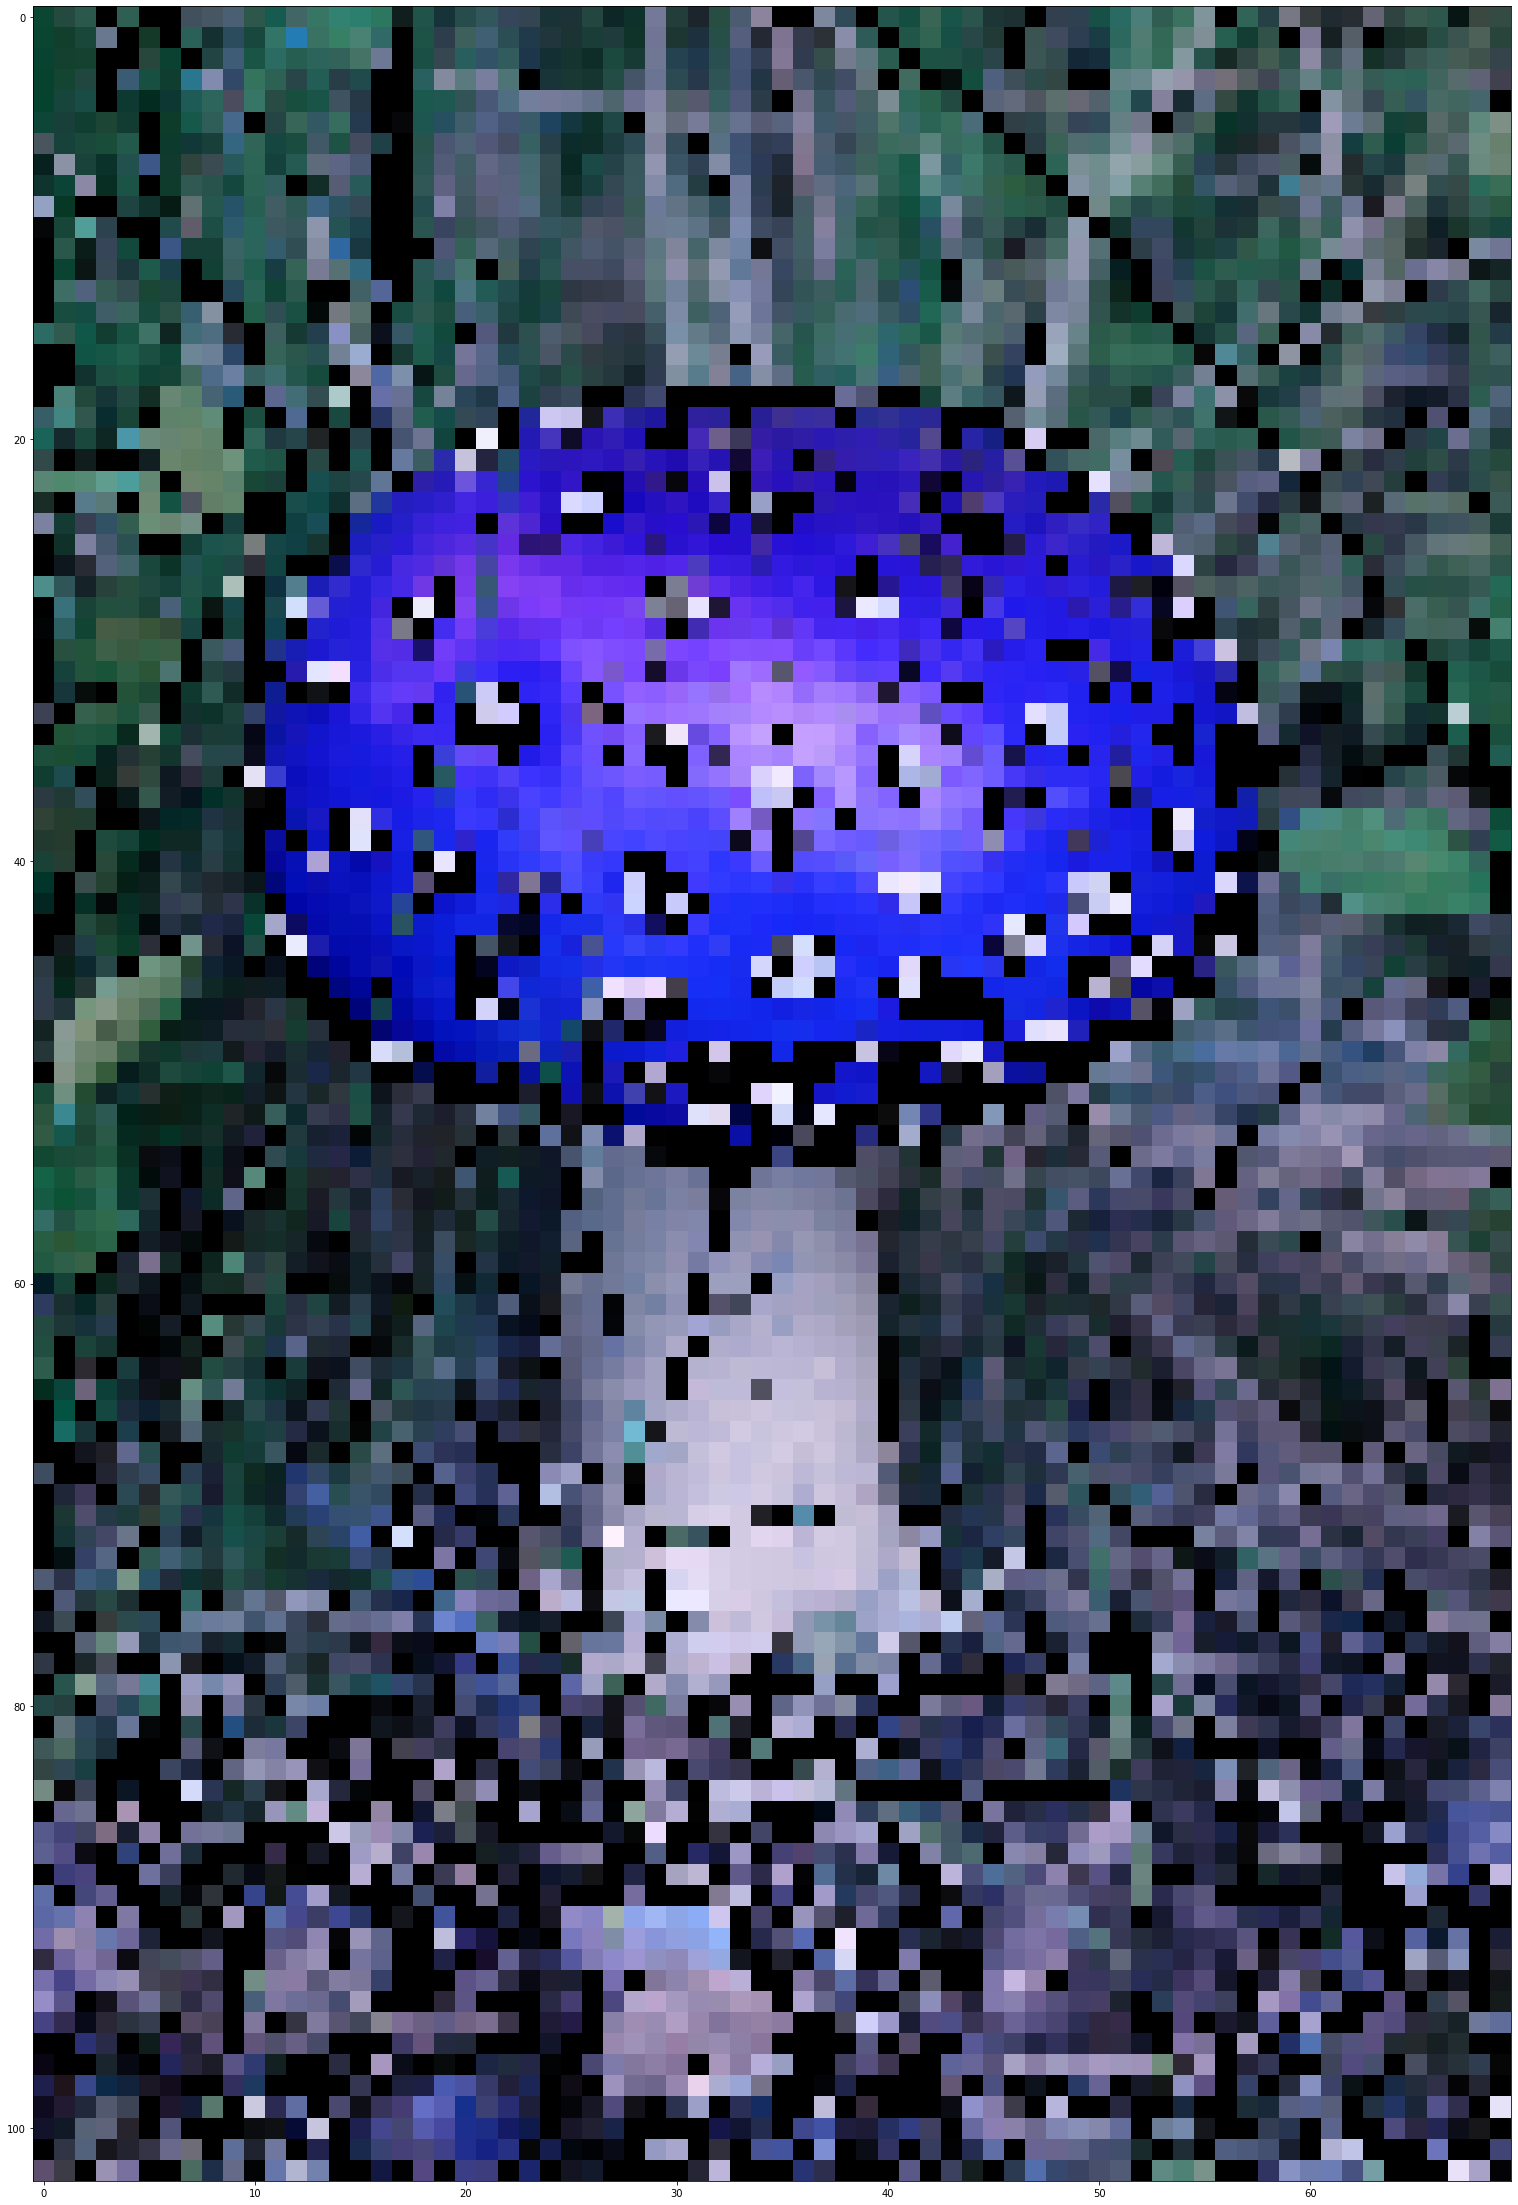

In [6]:
image = image_read('mushroom.jpg')
contours = get_contours(image, 0.1)
image_with_contours = apply_contours(image, contours)
resized_image = image_resize(image_with_contours, (25, 25))
post_processed_image = post_processing(resized_image, 1)
show_image(post_processed_image)

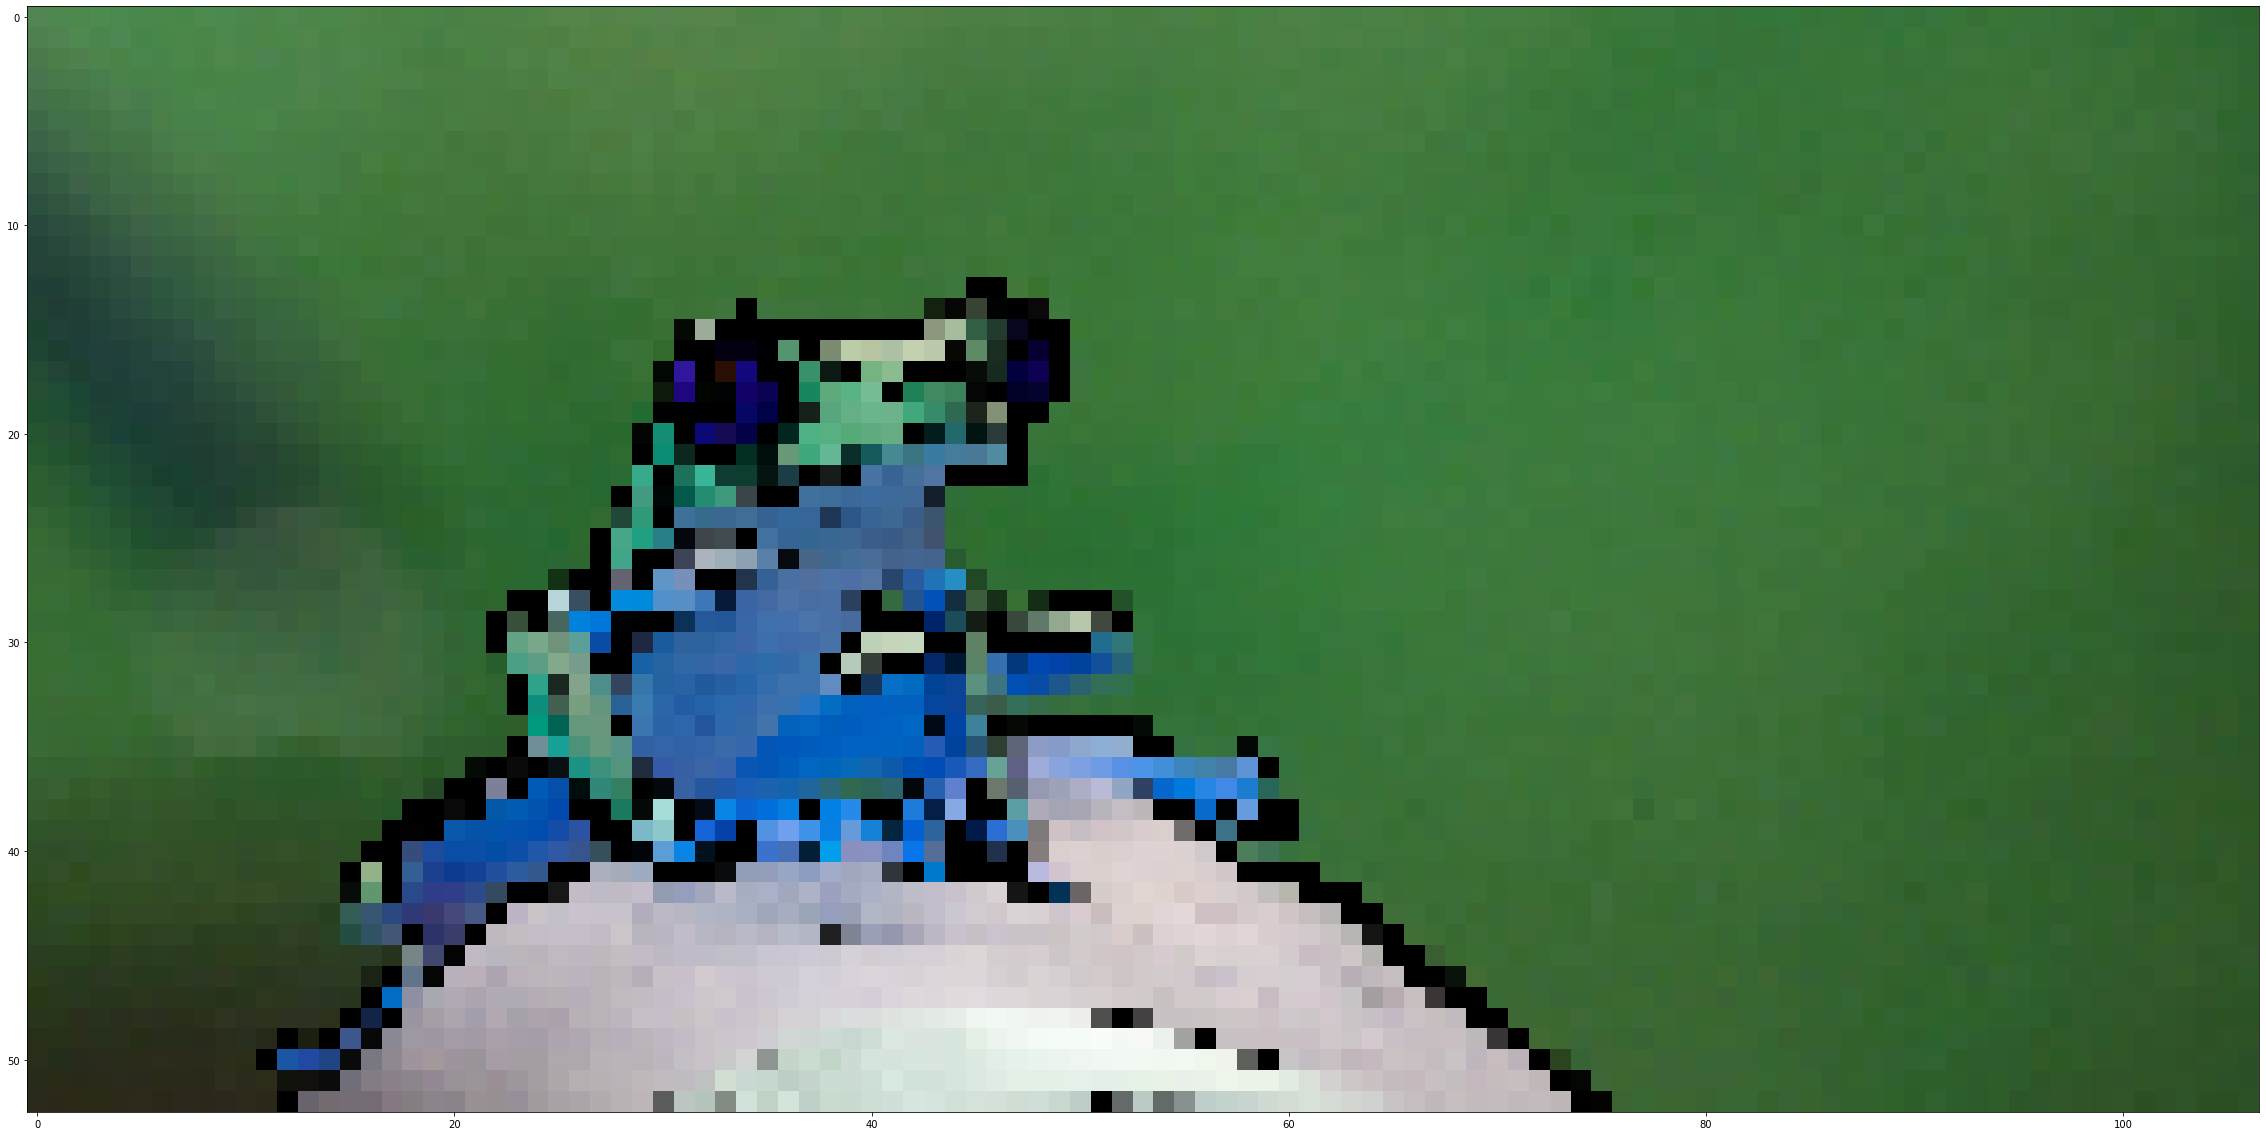

In [28]:
image = image_read('frog.jpg')
contours = get_contours(image, 0.15)
image_with_contours = apply_contours(image, contours)
resized_image = image_resize(image_with_contours, (6, 6))
post_processed_image = post_processing(resized_image, 1)
show_image(post_processed_image)

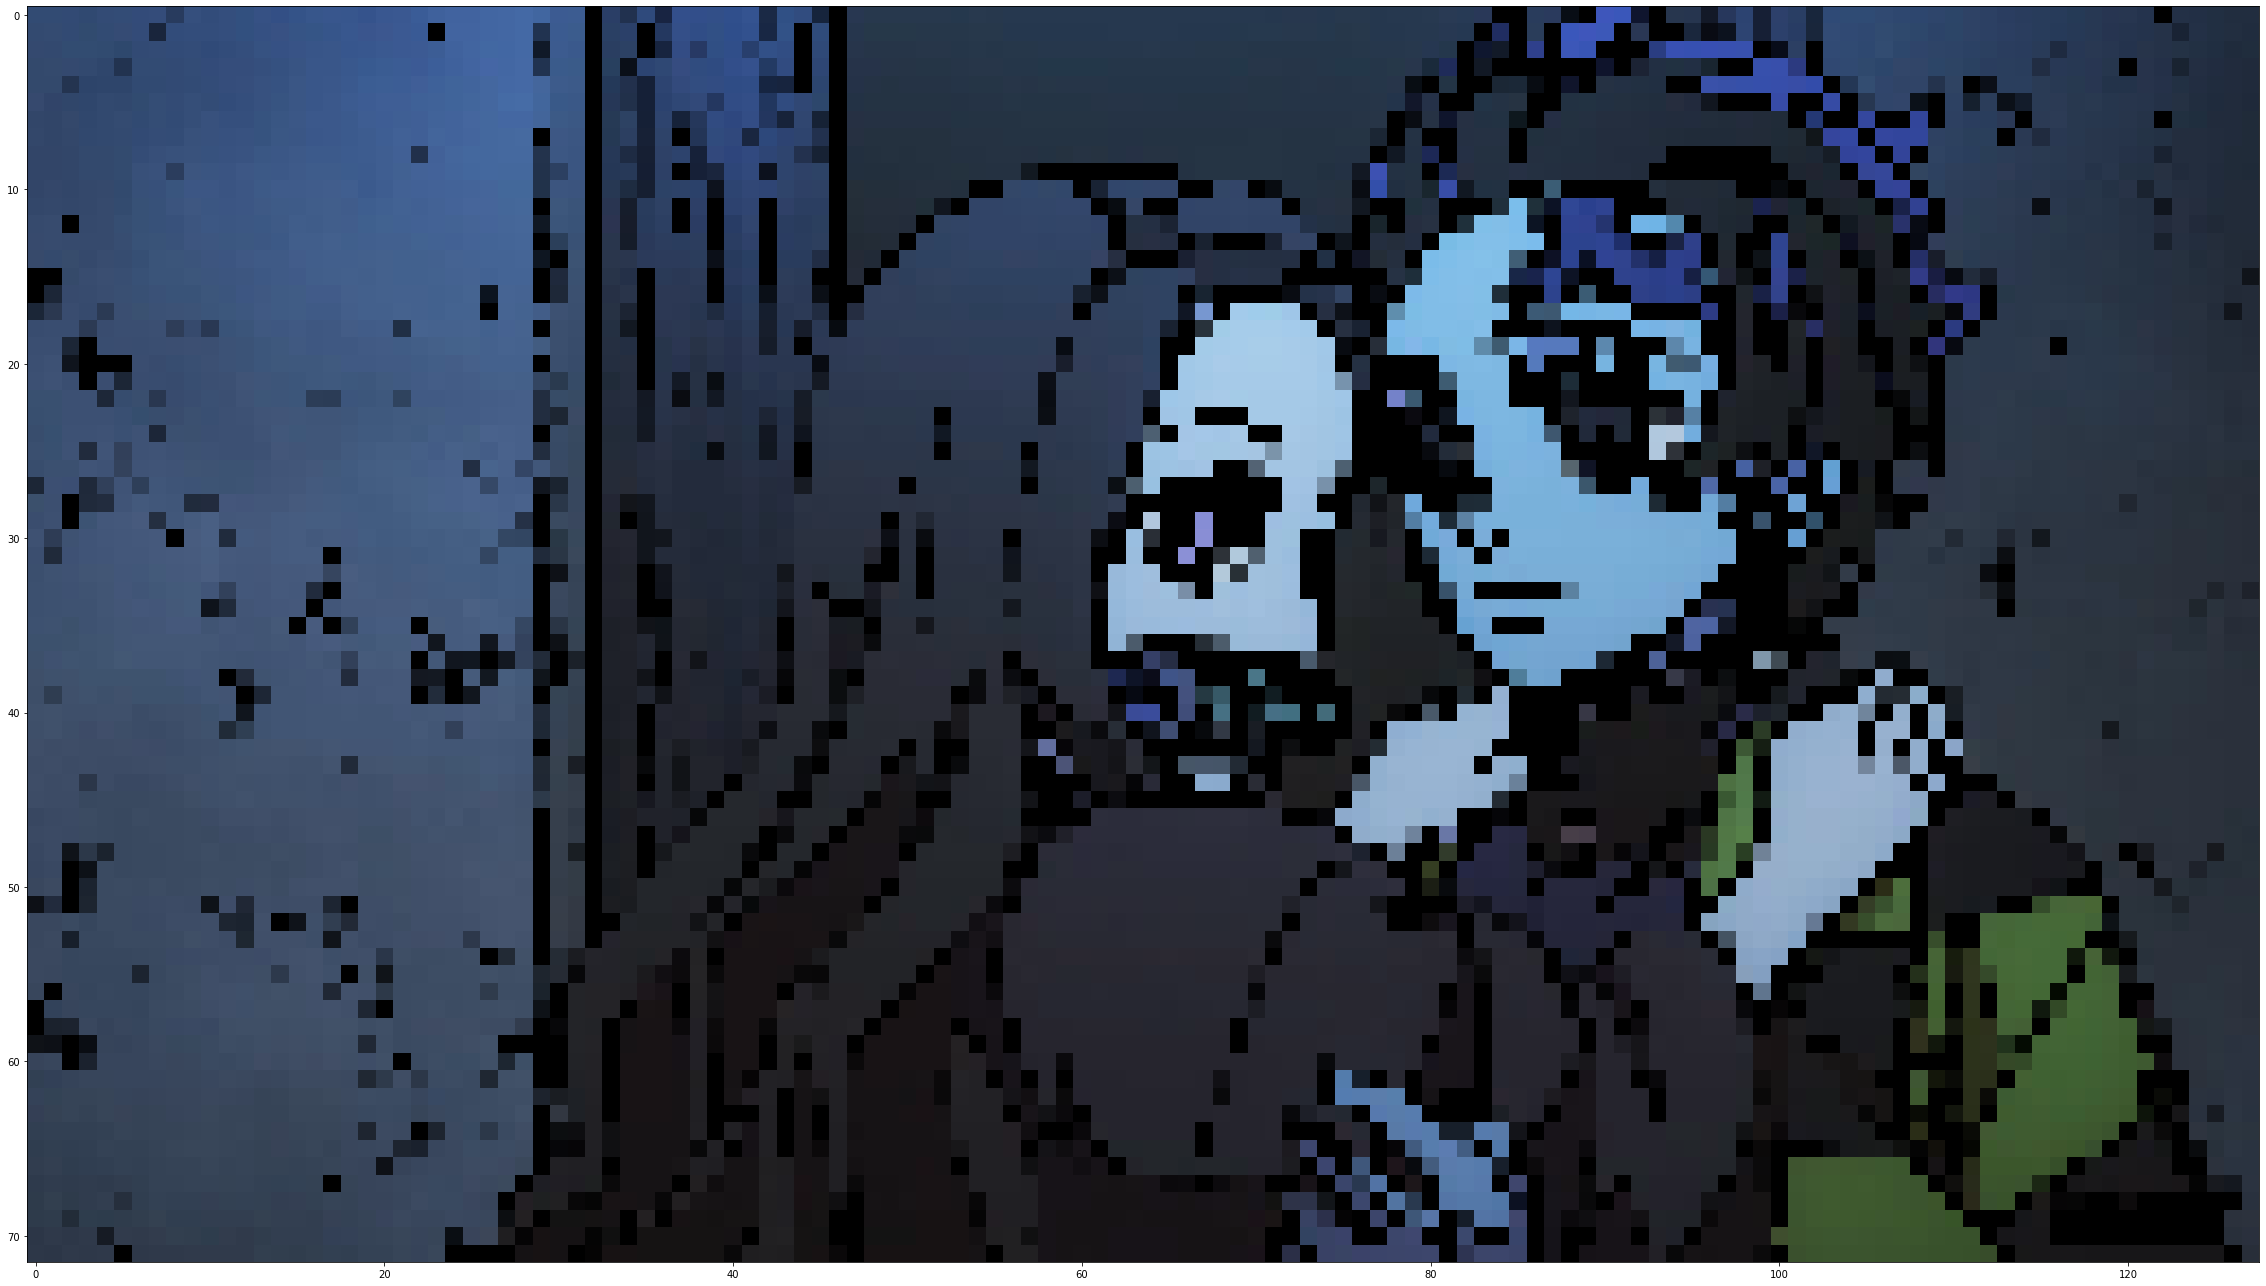

In [8]:
image = image_read('demon_slayer.jpg')
contours = get_contours(image, 0.02)
image_with_contours = apply_contours(image, contours)
resized_image = image_resize(image_with_contours, (10, 10))
post_processed_image = post_processing(resized_image, 1)
show_image(post_processed_image)

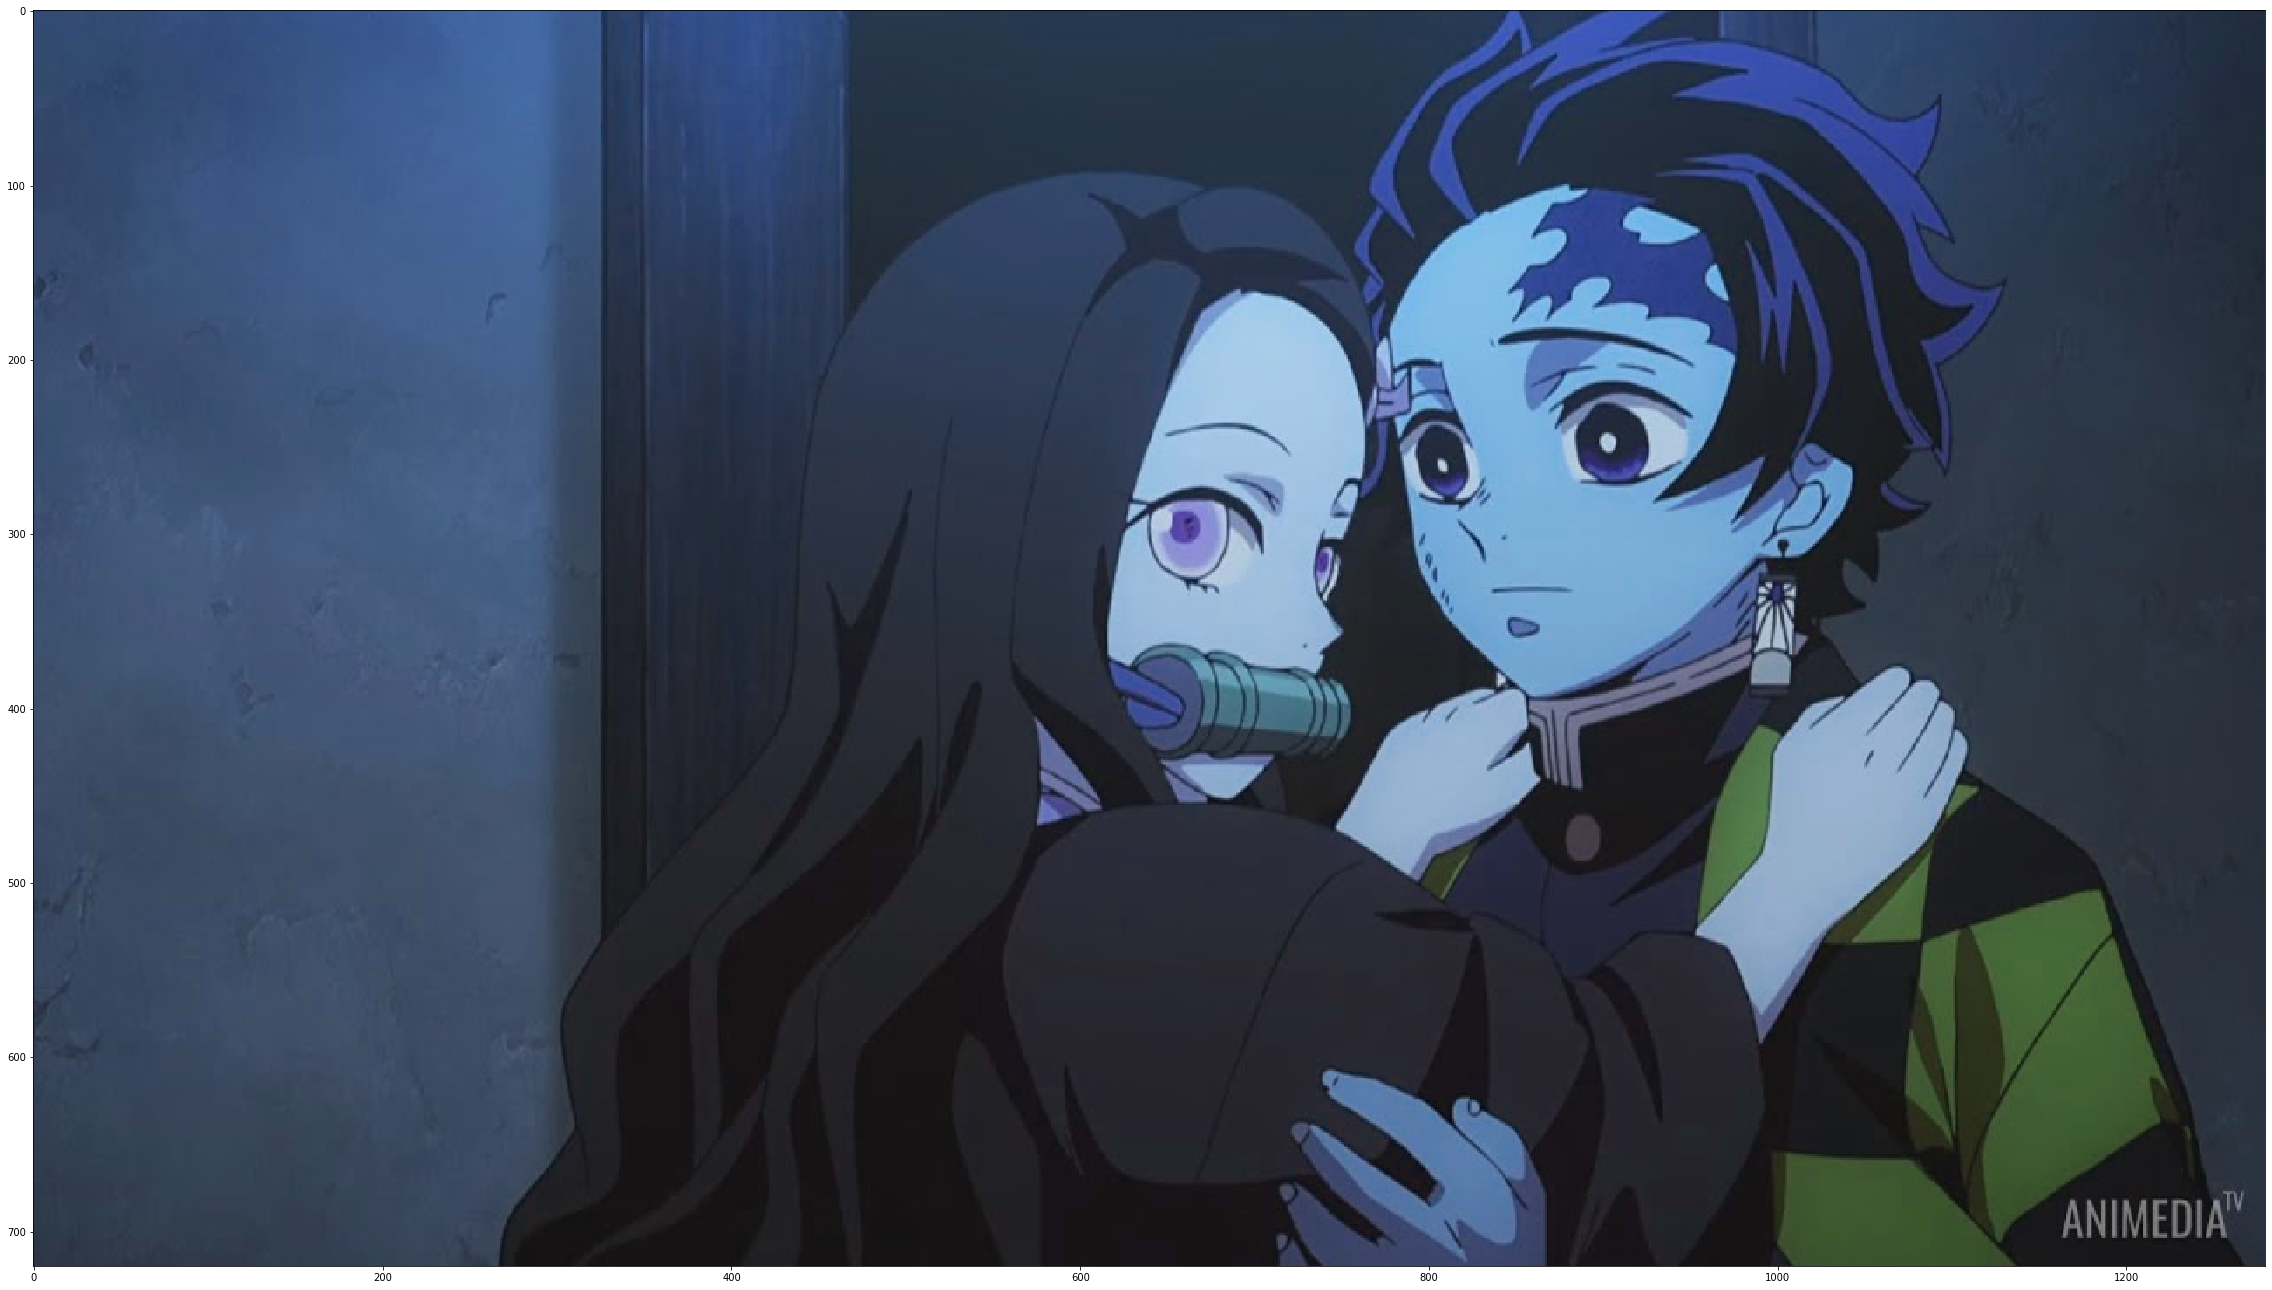

In [9]:
show_image(image_read('demon_slayer.jpg'))

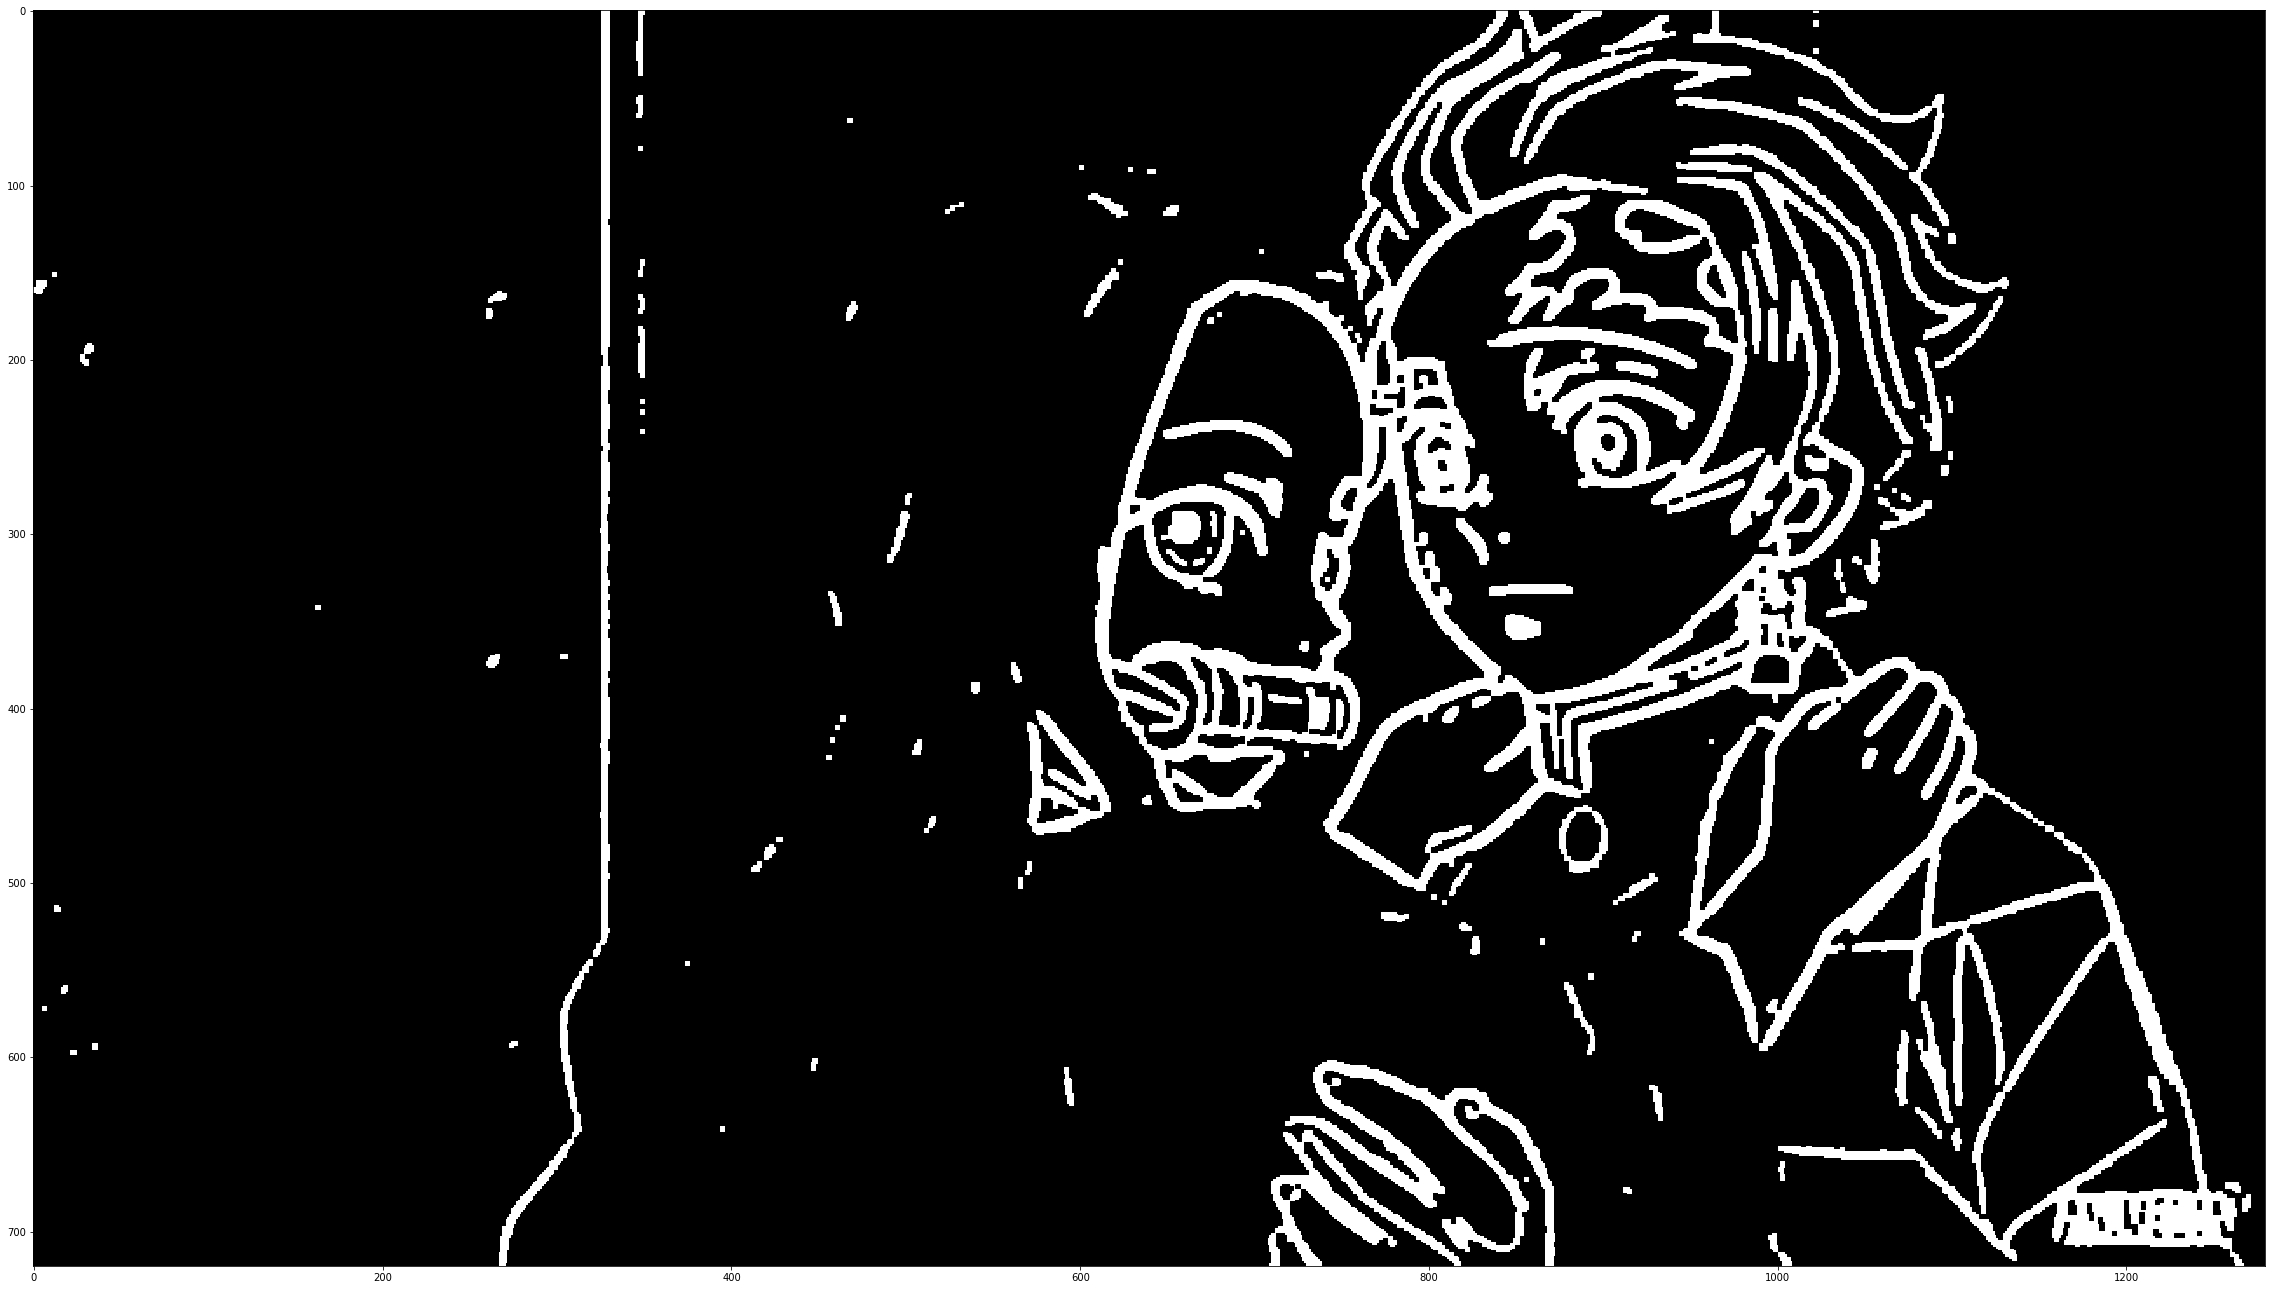

In [10]:
gray = cv2.cvtColor(image_read('demon_slayer.jpg'), cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (11, 11), 0)
threshold = cv2.adaptiveThreshold(
    blur, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    7,
    2)
inv = cv2.bitwise_not(threshold)
kernel = np.ones((5,5),np.uint8)
edges = cv2.dilate(inv, kernel)
kernel = np.ones((3,3),np.uint8)
edges = cv2.erode(edges, kernel)
show_image(edges)

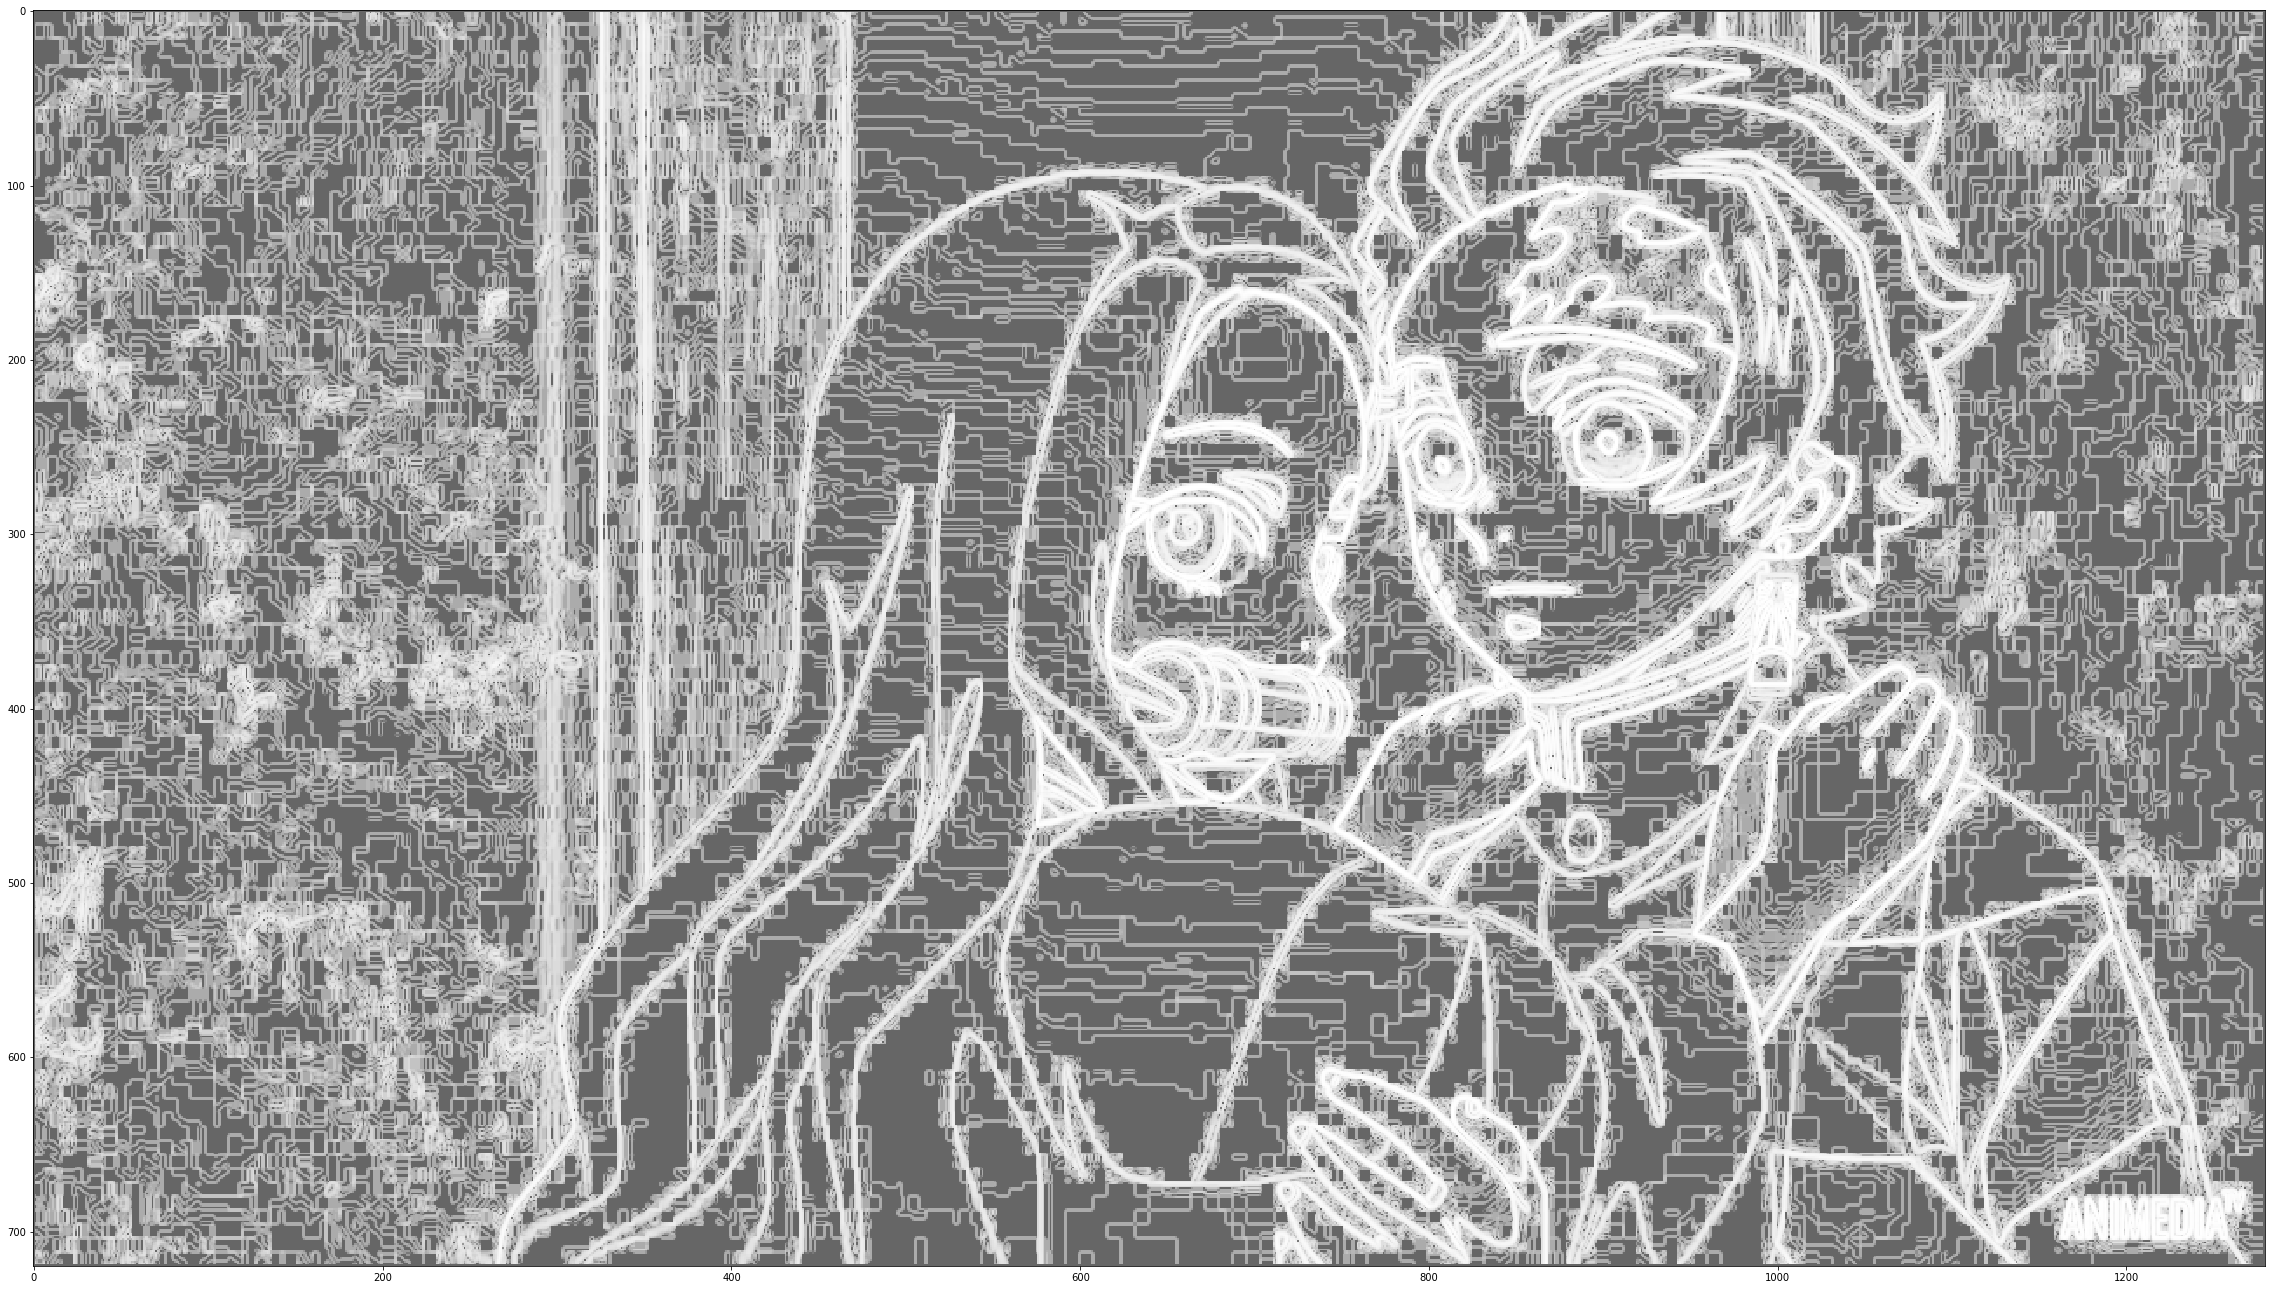

In [11]:
gray = cv2.cvtColor(image_read('demon_slayer.jpg'), cv2.COLOR_BGR2GRAY)
sobel = filters.sobel(gray)
equalized = exposure.equalize_hist(sobel)
show_image(equalized)

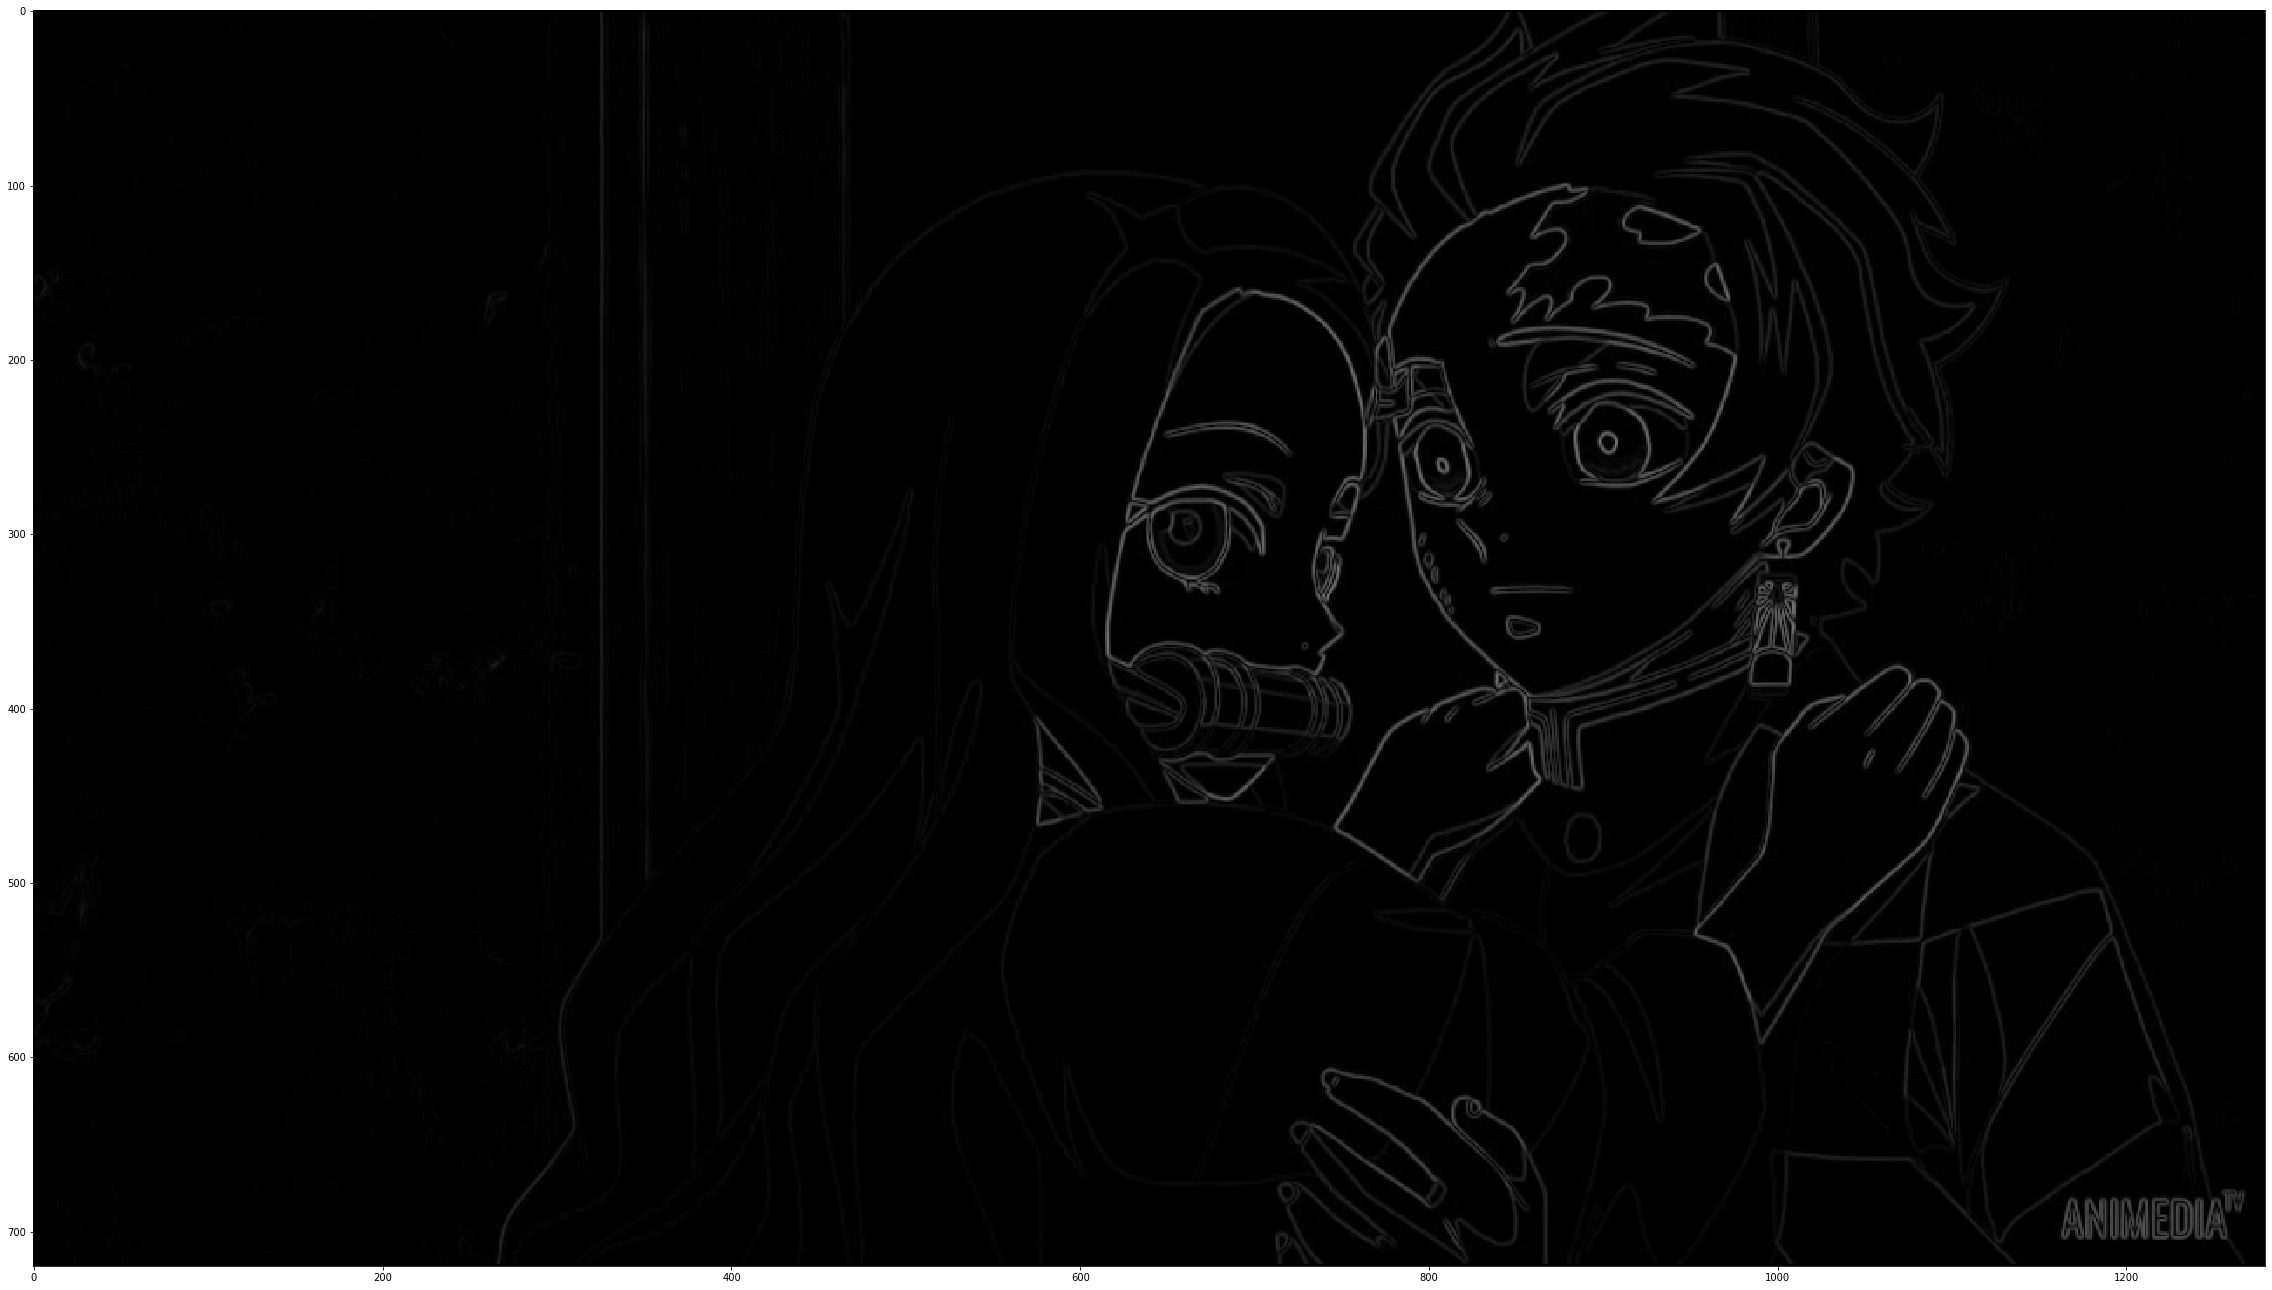

In [12]:
gray = cv2.cvtColor(image_read('demon_slayer.jpg'), cv2.COLOR_BGR2GRAY)
sobel = filters.sobel(gray)
show_image(sobel)

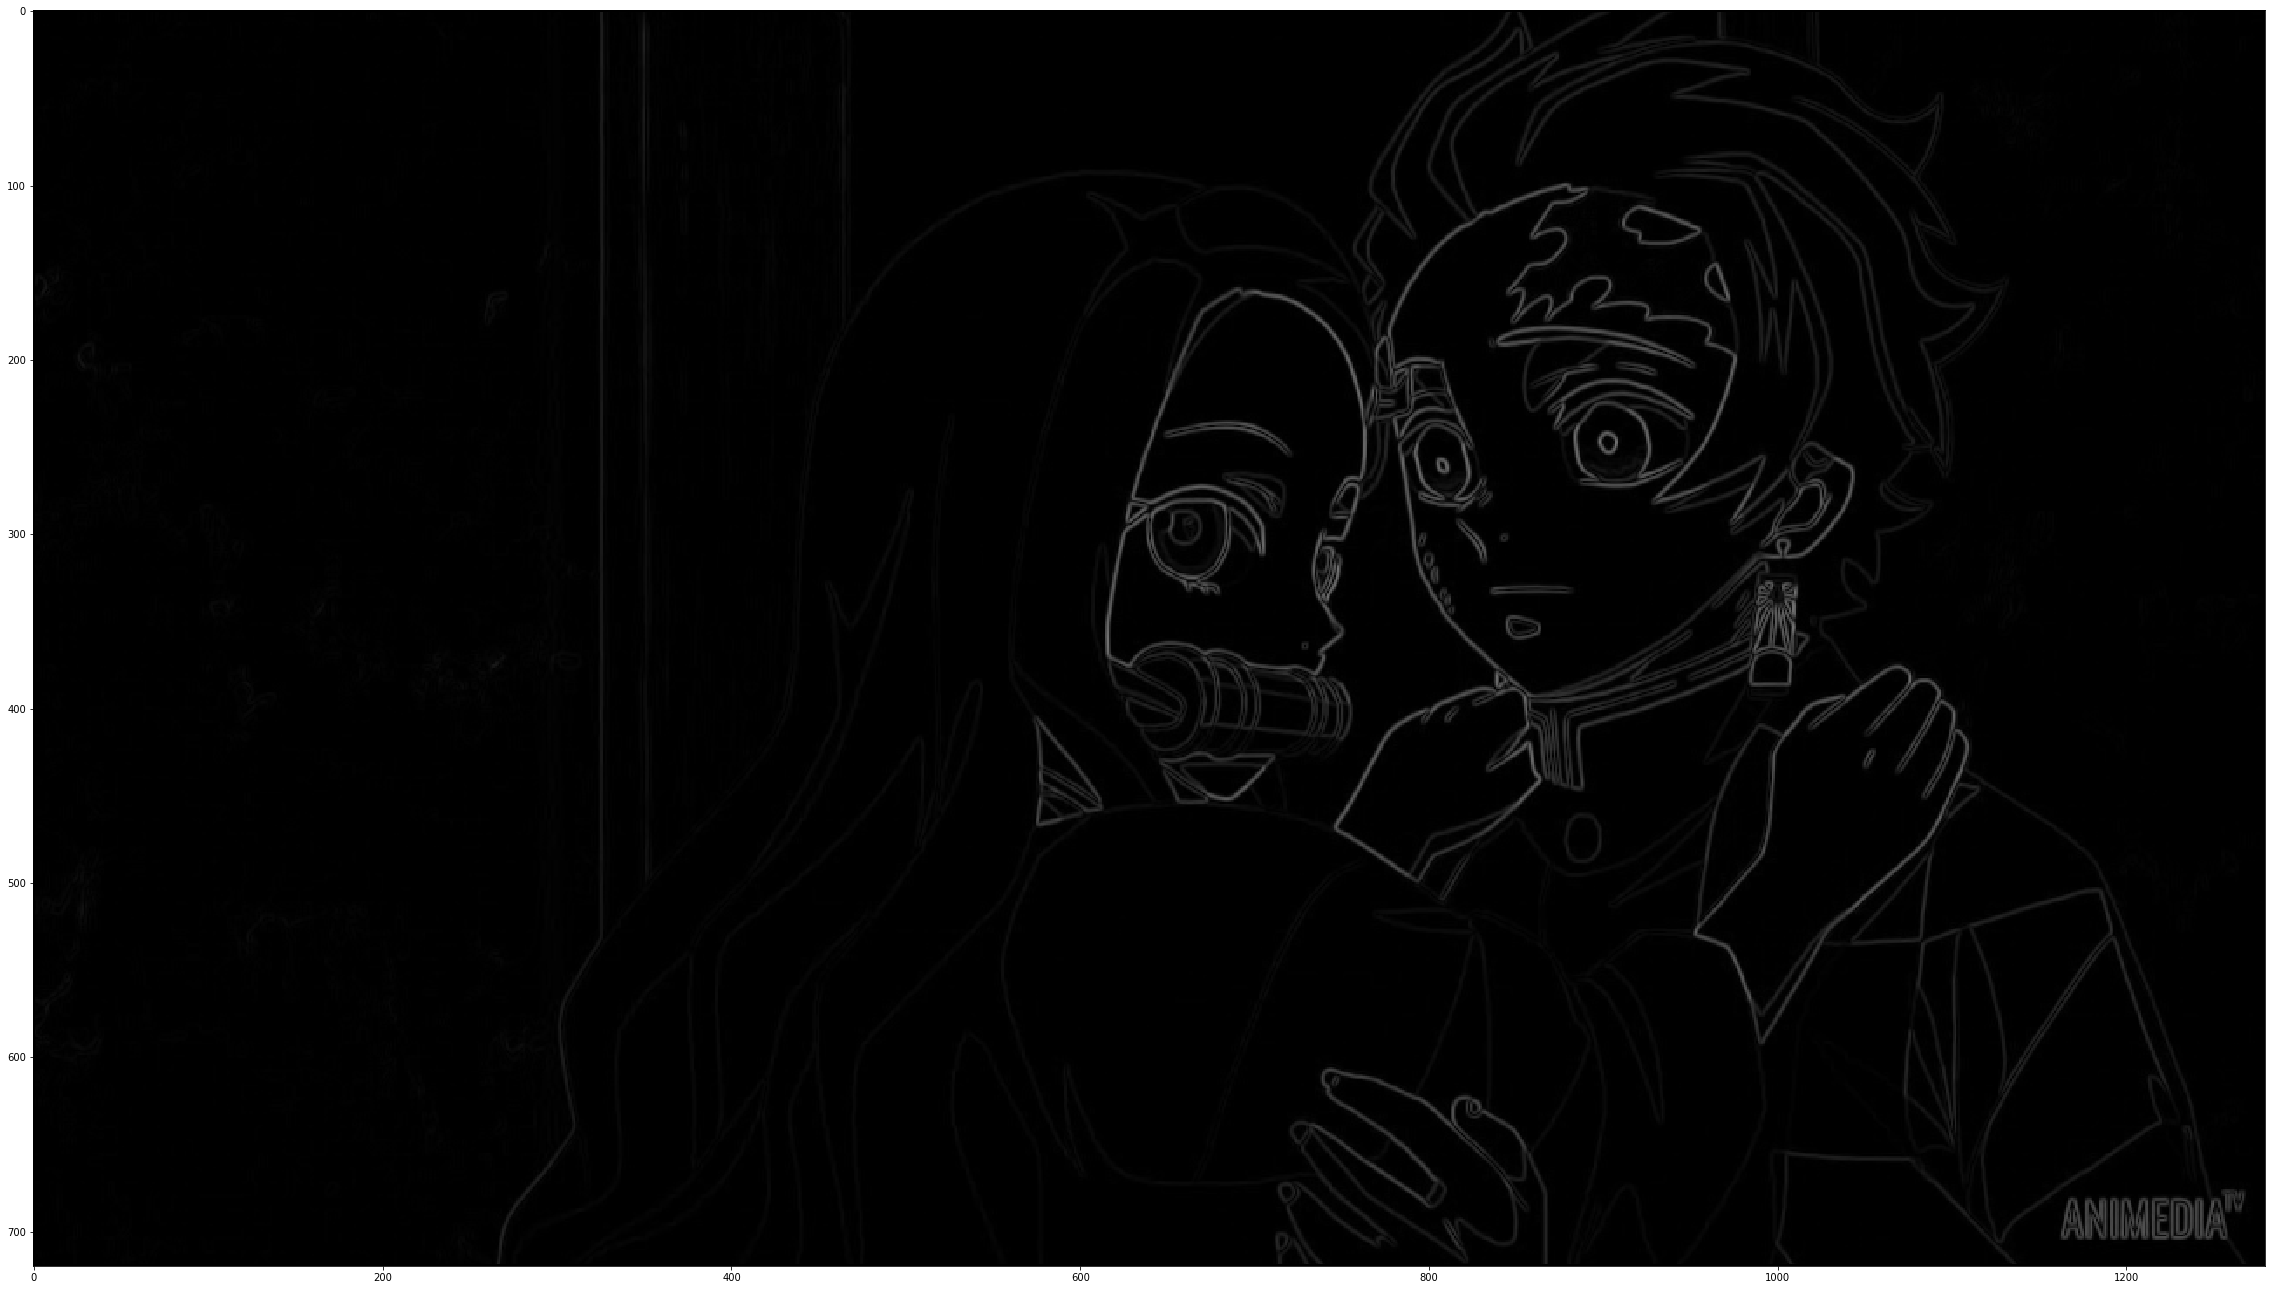

In [13]:
gray = cv2.cvtColor(image_read('demon_slayer.jpg'), cv2.COLOR_BGR2GRAY)
prewitt = filters.prewitt(gray)
show_image(prewitt)

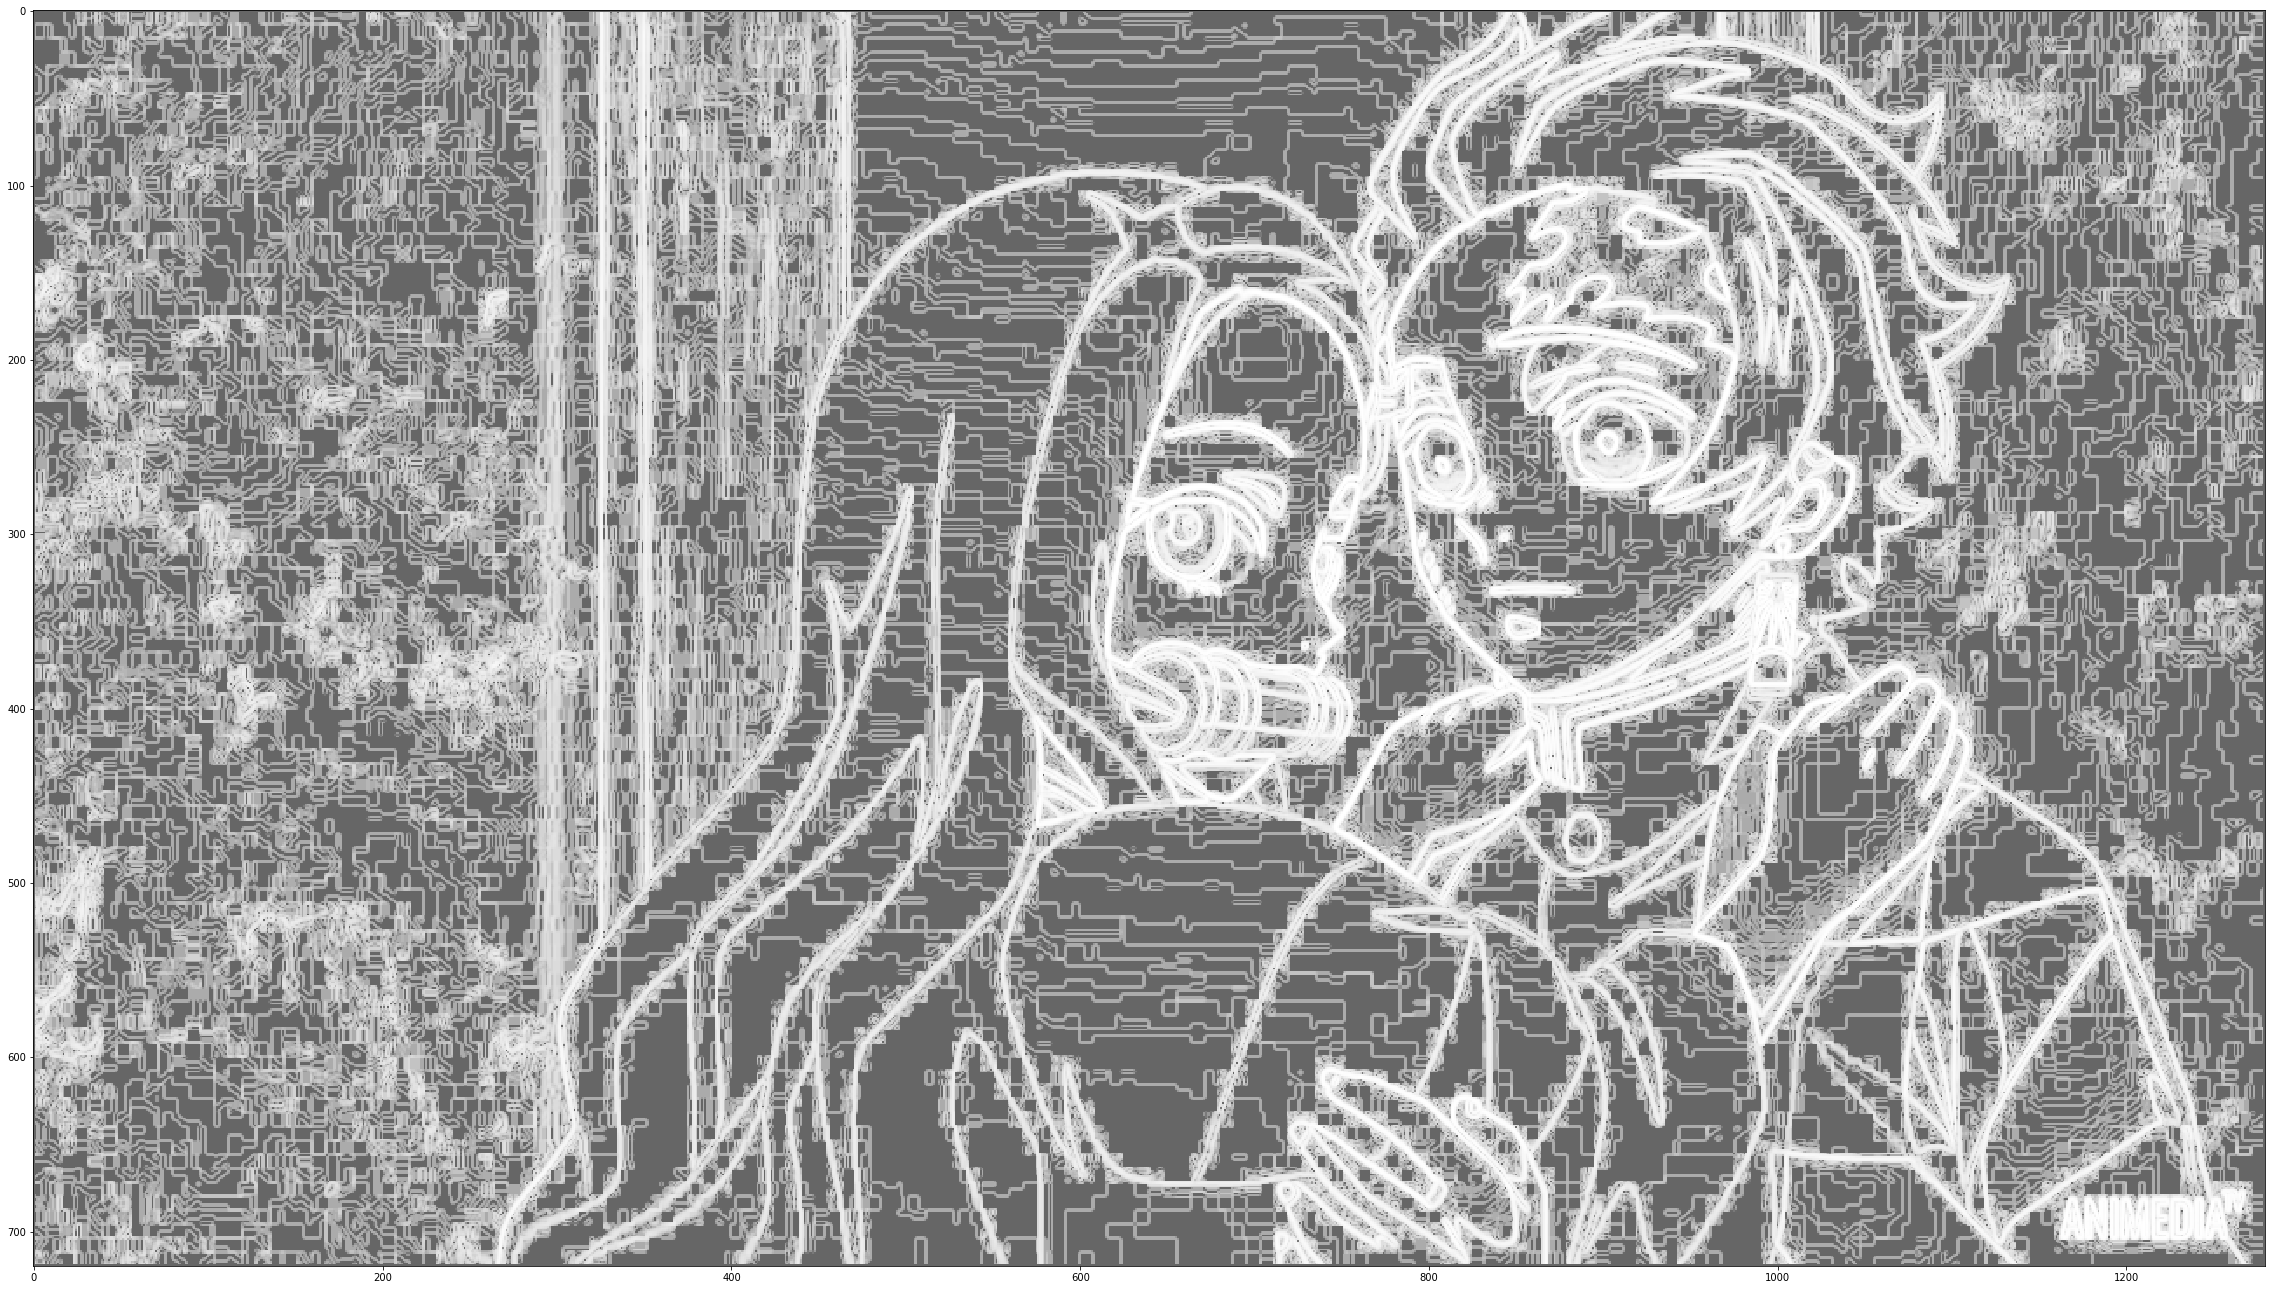

In [14]:
gray = cv2.cvtColor(image_read('demon_slayer.jpg'), cv2.COLOR_BGR2GRAY)
sobel = filters.sobel(gray)
equalized = exposure.equalize_hist(sobel)
show_image(equalized)

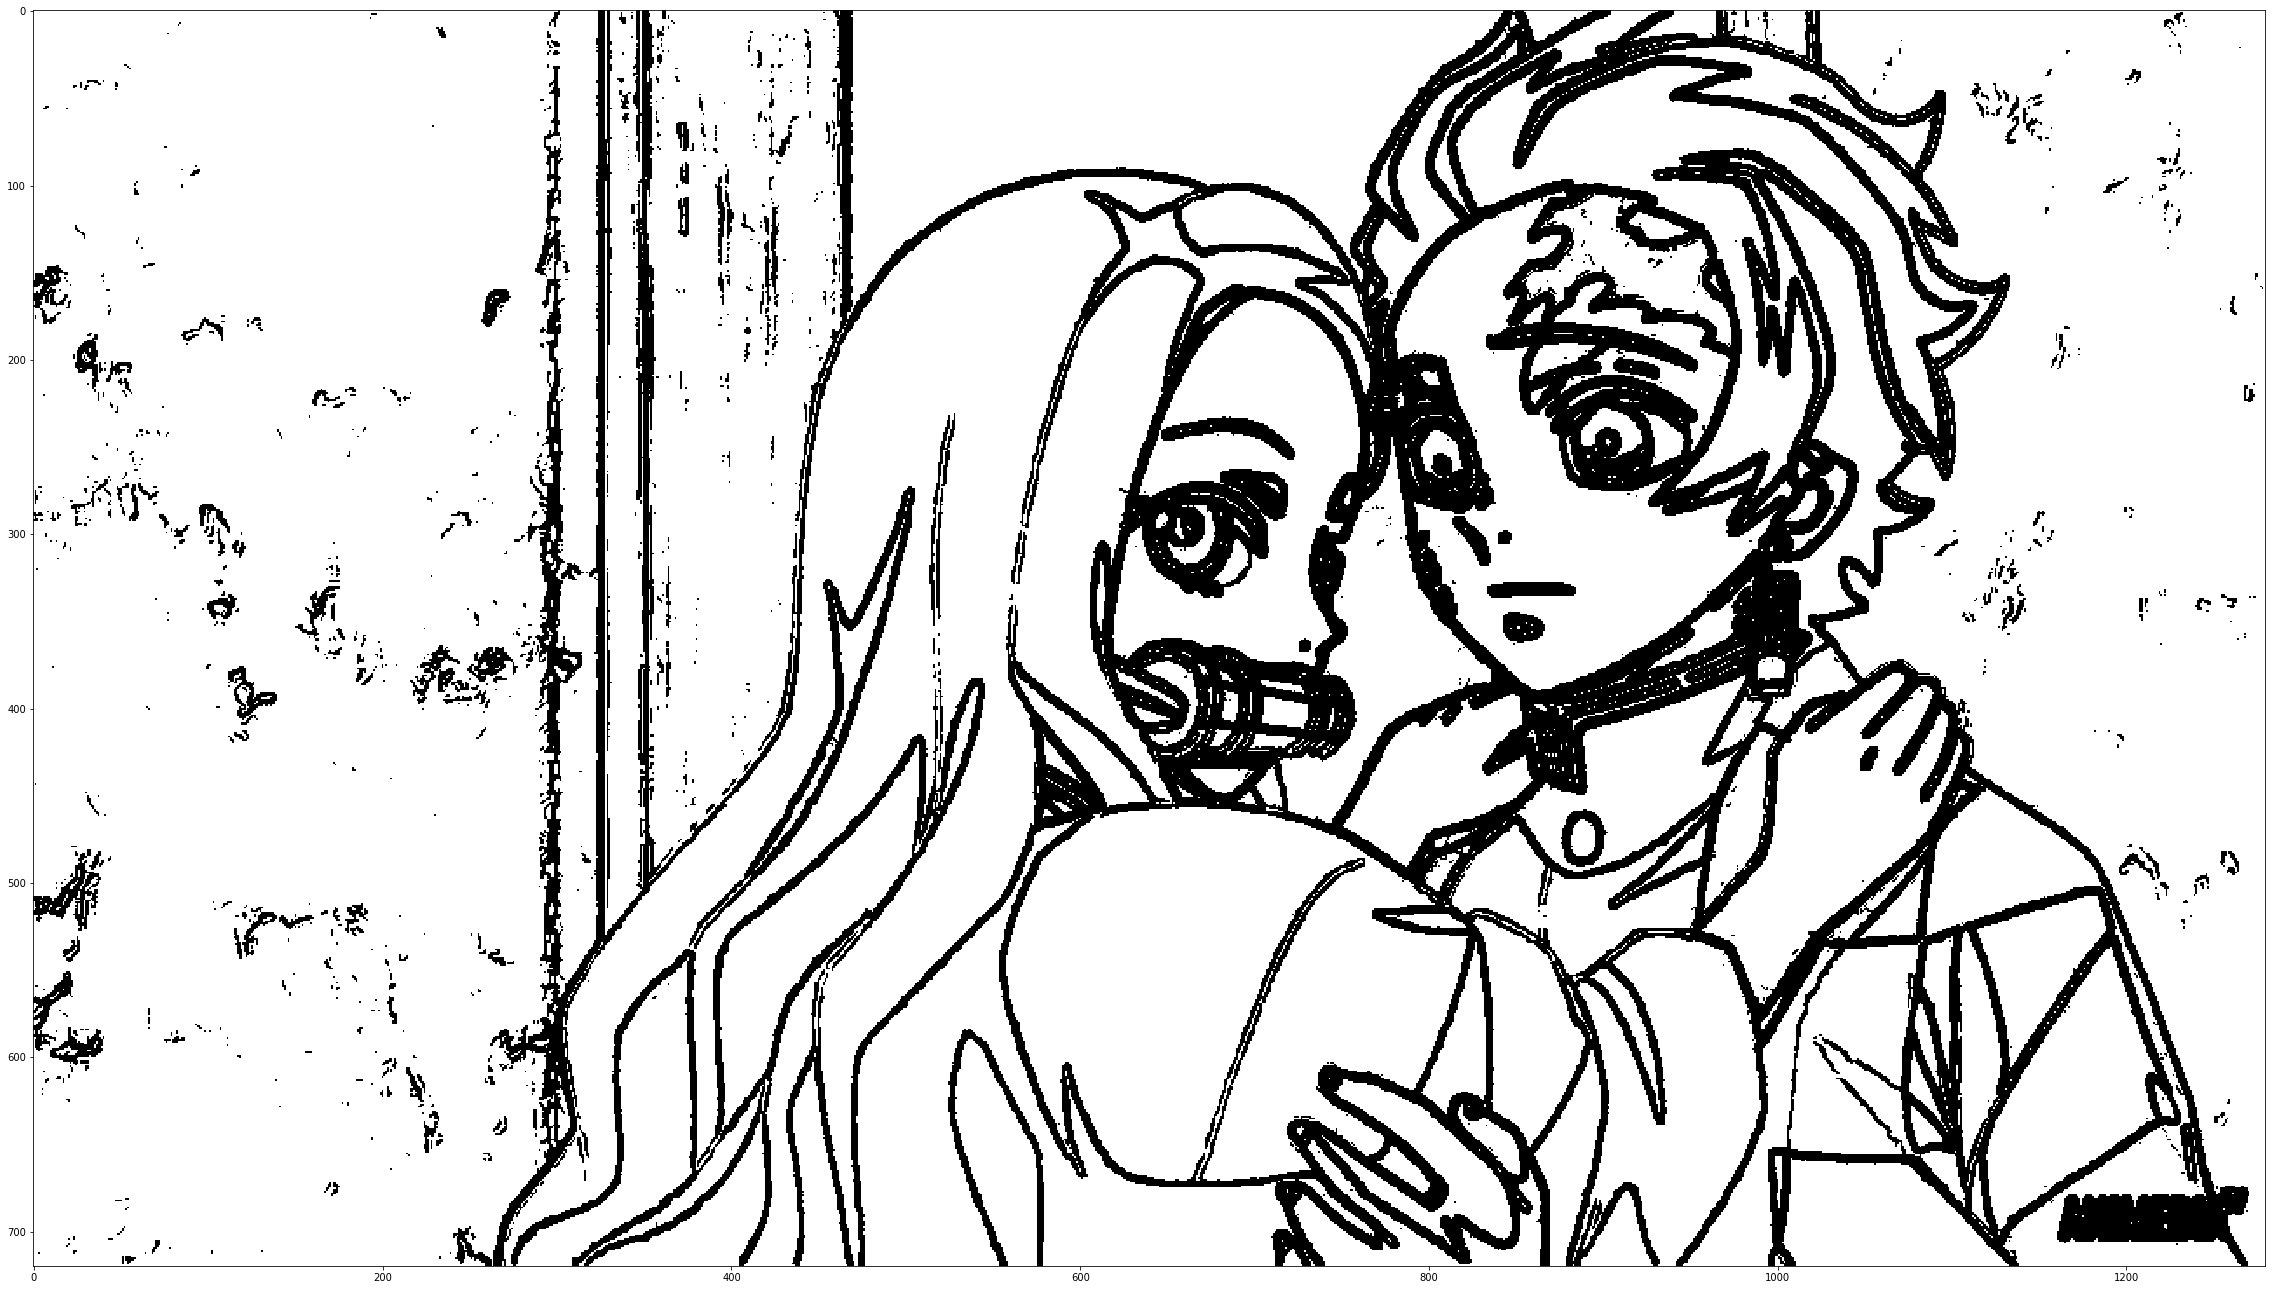

In [15]:
scale = 1
delta = 0
ddepth = cv2.CV_16S


gray = cv2.cvtColor(image_read('demon_slayer.jpg'), cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

grad_x = cv2.Sobel(blur, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(blur, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

normalized = normalize(grad, 0, 1)
threshold = np.vectorize(lambda x: 0 if x > 0.025 else 1)(normalized)

show_image(threshold)